In [1]:
# To start with, data will be aggregated by user ID and only users that visited the supermarket at least once in 2015 and 2013 
# will remain in the dataset.

#Identification of customers (staff members) who actually used their loyalty card in most transactions.
#-------------------------------------------------------------------------------------------------------#
## For example, there is a customer ID (from a loyalty card) attached to most transaction. 
## However, not every customer shopping in the supermarket has a loyalty card or uses it at the register. 
## If customer has no card, then a staff member on the register will use one of “generic” cards. 
## As a result, it looks as there are several customers buying too many products – much more than you might expect for 
## the “normal” customer. This is not true. These “super” customers were customers without loyalty cards and 
## staff members on the register used default cards.

# Check the project workspace and set paths for folders.

import os
os.chdir('G:\Customer Analytics in Large Organisations\Assignment 1')
path1 = r'G:\Customer Analytics in Large Organisations\Assignment 1\2013'
path2 = r'G:\Customer Analytics in Large Organisations\Assignment 1\2014'
path3 = r'G:\Customer Analytics in Large Organisations\Assignment 1\2015'
print("Project Workspace:", os.getcwd())
print()

# Import all necessary packages for the project.
import pandas as pd
import statistics as myStats
import glob
import numpy as np
from pandasql import sqldf

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Revome scientific notation to expand numbers in the dataset up to the
# second decimal place.
pd.set_option('display.float_format', lambda x: '%.4f' % x)
#pd.set_option('display.float_format', lambda x: '%,g' % x)

Project Workspace: G:\Customer Analytics in Large Organisations\Assignment 1



In [2]:
# Import data for each day and collate the data. For this, we create a function "importAndCollate1()" for year 2013.

def importAndCollate1():
    dataFileList = []
    fileNames = [fileName for fileName in glob.glob(path1 + "/*.csv", recursive = True)]
    for fileName in fileNames:
        dataFileList.append(pd.read_csv(fileName))
    year2013DataFile = pd.concat(dataFileList, ignore_index = False)
    print("Size of Dataset:", year2013DataFile.shape)
    return year2013DataFile

In [3]:
# Import data for each day and collate the data. For this, we create a function "importAndCollate2()" for year 2014.

def importAndCollate2():
    dataFileList = []
    fileNames = [fileName for fileName in glob.glob(path2 + "/*.csv", recursive = True)]
    for fileName in fileNames:
        dataFileList.append(pd.read_csv(fileName))
    year2014DataFile = pd.concat(dataFileList, ignore_index = False)
    print("Size of Dataset:", year2014DataFile.shape)
    return year2014DataFile

In [4]:
# Import data for each day and collate the data. For this, we create a function "importAndCollate3()" for year 2015.


def importAndCollate3():
    dataFileList = []
    fileNames = [fileName for fileName in glob.glob(path3 + "/*.csv", recursive = True)]
    for fileName in fileNames:
        dataFileList.append(pd.read_csv(fileName))
    year2015DataFile = pd.concat(dataFileList, ignore_index = False)
    print("Size of Dataset:", year2015DataFile.shape)
    return year2015DataFile

In [5]:
# Import all data for year 2013 and collate it in one dataframe.

year2013DataFile = importAndCollate1()

Size of Dataset: (12526008, 14)


In [6]:
#year2013DataFile.head(10)

In [7]:
# Import all data for year 2014 and collate it in one dataframe.

year2014DataFile = importAndCollate2()

G:\Installations\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Size of Dataset: (12560113, 14)


In [8]:
# Import all data for year 2015 and collate it in one dataframe.

year2015DataFile = importAndCollate3()

Size of Dataset: (12285455, 14)


In [9]:
#year2013DataFile.to_csv(r'G:\Customer Analytics in Large Organisations\Assignment 1\Consolidated_2013.csv', index = False) 

In [10]:
#year2014DataFile.to_csv(r'G:\Customer Analytics in Large Organisations\Assignment 1\Consolidated_2014.csv', index = False) 

In [11]:
#year2015DataFile.to_csv(r'G:\Customer Analytics in Large Organisations\Assignment 1\Consolidated_2015.csv', index = False) 

In [12]:
# Remove "NA" from "UniSA_Customer_No" and delete unnessary columns and values into a new data frame df1 for the year 2013 file.

year2013DataFile = year2013DataFile.dropna(subset=['UniSA_Customer_No'])
df1 = pd.DataFrame(data=year2013DataFile)
df1['UniSA_Customer_No'] = ['%.12g' % n for n in df1['UniSA_Customer_No']]
del df1['Sale_Time']
del df1['Barcode_Item']
del df1['Item_Description']
del df1['Department_Name']
del df1['Commodity_Name']
del df1['Offer']
df1

,Sale_Date,UniSA_Receipt_No1,Receipt_Line_No,UniSA_Customer_No,Total_Sale_Amount_InclusiveGST,Total_Receipt_Lines,Quantity_Sold,Item_Value
0,2013-01-02,734714,1,7016620670,5.1000,3,1.0000,1.9500
1,2013-01-02,734714,2,7016620670,5.1000,3,1.0000,1.9500
2,2013-01-02,734714,3,7016620670,5.1000,3,1.0000,1.2000
3,2013-01-02,734715,1,7497467924,3.4900,1,1.0000,3.4900
4,2013-01-02,871088,1,458487570,16.7500,5,1.0000,1.9900
...,...,...,...,...,...,...,...,...
40889,2013-12-31,501735,62,5823905204,215.9900,66,1.0000,0.9900
40890,2013-12-31,501735,63,5823905204,215.9900,66,1.0000,0.9900
40891,2013-12-31,501735,64,5823905204,215.9900,66,1.0000,0.9900
40892,2013-12-31,501735,65,5823905204,215.9900,66,1.0000,0.9900


In [13]:
# Remove "NA" from "UniSA_Customer_No" and delete unnessary columns and values into a new data frame df2 for the year 2014 file.

year2014DataFile = year2014DataFile.dropna(subset=['UniSA_Customer_No'])
df2 = pd.DataFrame(data=year2014DataFile)
df2['UniSA_Customer_No'] = ['%.12g' % n for n in df2['UniSA_Customer_No']]
#del df2['Sale_Time']
del df2['Barcode_Item']
del df2['Item_Description']
del df2['Department_Name']
del df2['Commodity_Name']
del df2['Offer']
df2

,Sale_Date,Sale_Time,UniSA_Receipt_No1,Receipt_Line_No,UniSA_Customer_No,Total_Sale_Amount_InclusiveGST,Total_Receipt_Lines,Quantity_Sold,Item_Value
0,2014-01-02,08:03,50661,1,693320906,1.2000,1,1.0000,1.2000
1,2014-01-02,08:04,50662,1,3027124388,1.2000,1,1.0000,1.2000
2,2014-01-02,08:04,498614,1,2479711497,29.8900,1,1.0000,29.8900
3,2014-01-02,08:08,400888,1,555957017,11.3400,3,1.6400,6.2000
4,2014-01-02,08:08,400888,2,555957017,11.3400,3,1.0000,2.9900
...,...,...,...,...,...,...,...,...,...
52995,2014-12-31,NaN,516179,22,8078832382,197.8400,27,1.0000,17.5800
52996,2014-12-31,NaN,516179,23,8078832382,197.8400,27,3.0000,11.8500
52997,2014-12-31,NaN,516179,24,8078832382,197.8400,27,1.0000,5.5900
52998,2014-12-31,NaN,516179,25,8078832382,197.8400,27,1.0000,5.5900


In [14]:
# Remove "NA" from "UniSA_Customer_No" and delete unnessary columns and values into a new data frame df3 for the year 2015 file.

year2015DataFile = year2015DataFile.dropna(subset=['UniSA_Customer_No'])
df3 = pd.DataFrame(data=year2015DataFile)
df3['UniSA_Customer_No'] = ['%.12g' % n for n in df3['UniSA_Customer_No']]
del df3['Sale_Time']
del df3['Barcode_Item']
del df3['Item_Description']
del df3['Department_Name']
del df3['Commodity_Name']
del df3['Offer']
df3

,Sale_Date,UniSA_Receipt_No1,Receipt_Line_No,UniSA_Customer_No,Total_Sale_Amount_InclusiveGST,Total_Receipt_Lines,Quantity_Sold,Item_Value
0,2015-01-02,51019,1,7416193812,94.9300,20,0.7250,3.6200
1,2015-01-02,51019,2,7416193812,94.9300,20,0.3842,7.6800
2,2015-01-02,51019,3,7416193812,94.9300,20,0.3222,6.4400
3,2015-01-02,51019,4,7416193812,94.9300,20,0.7337,7.3300
4,2015-01-02,51019,5,7416193812,94.9300,20,1.0462,6.7900
...,...,...,...,...,...,...,...,...
49481,2015-12-31,15123131049443,35,9333734328,179.0200,39,3.0000,11.9700
49482,2015-12-31,15123131049443,36,9333734328,179.0200,39,1.0000,1.1900
49483,2015-12-31,15123131049443,37,9333734328,179.0200,39,2.0000,3.4000
49484,2015-12-31,15123131049443,38,9333734328,179.0200,39,0.3000,4.5000


In [15]:
# Extracting unique "UniSA_Customer_No" from 2013 dataset.

sample1 = pd.DataFrame(df1['UniSA_Customer_No'].unique())
sample1.columns = ['UniSA_Customer_No']
sample1 = pd.to_numeric(sample1.UniSA_Customer_No, errors='coerce').convert_dtypes()
#sample1 = sorted(sample1.UniSA_Customer_No)
sample1 = pd.DataFrame(sample1)
sample1

,UniSA_Customer_No
0,7016620670
1,7497467924
2,458487570
3,3056310265
4,8064690113
...,...
13522,5416115839
13523,8651574448
13524,6236124408
13525,7105414532


In [16]:
# Extracting unique "UniSA_Customer_No" from 2014 dataset.

sample2 = pd.DataFrame(df2['UniSA_Customer_No'].unique())
sample2.columns = ['UniSA_Customer_No']
sample2 = pd.to_numeric(sample2.UniSA_Customer_No, errors='coerce').convert_dtypes()
#sample2 = sorted(sample2.UniSA_Customer_No)
sample2 = pd.DataFrame(sample2)
sample2

,UniSA_Customer_No
0,693320906
1,3027124388
2,2479711497
3,555957017
4,3353063604
...,...
13939,8124431616
13940,5949334180
13941,1067843598
13942,9116814303


In [17]:
# Extracting unique "UniSA_Customer_No" from 2015 dataset.

sample3 = pd.DataFrame(df3['UniSA_Customer_No'].unique())
sample3.columns = ['UniSA_Customer_No']
sample3 = pd.to_numeric(sample3.UniSA_Customer_No, errors='coerce').convert_dtypes()
#sample3 = sorted(sample3.UniSA_Customer_No)
sample3 = pd.DataFrame(sample3)
sample3

,UniSA_Customer_No
0,7416193812
1,3916558406
2,7124281871
3,693320906
4,4882665034
...,...
13714,9626430536
13715,4835576138
13716,2283369945
13717,2603142902


In [ ]:
#sample1.to_csv(r'G:\Customer Analytics in Large Organisations\Assignment 1\sample1.csv', index = False) 

In [ ]:
#sample2.to_csv(r'G:\Customer Analytics in Large Organisations\Assignment 1\sample2.csv', index = False) 

In [ ]:
#sample3.to_csv(r'G:\Customer Analytics in Large Organisations\Assignment 1\sample3.csv', index = False) 

In [ ]:
# Finding sample both samples of 2013 and 2014.

#pysqldf = lambda q: sqldf(q, globals())
#q = """SELECT a.UniSA_Customer_No, b.UniSA_Customer_No
#       FROM 
#           sample1 a
#       INNER JOIN 
#           sample2 b
#        ON a.UniSA_Customer_No = b.UniSA_Customer_No;"""
#
#join = pysqldf(q)
#joined = pd.DataFrame(join)
#joined

In [18]:
joined1 = pd.merge(sample2,sample1,on='UniSA_Customer_No')
joined1

,UniSA_Customer_No
0,693320906
1,3027124388
2,2479711497
3,555957017
4,3353063604
...,...
12123,3655011541
12124,6206177823
12125,6992424316
12126,8124431616


In [19]:
joined2 = pd.merge(joined1,sample3,on='UniSA_Customer_No')
joined2

,UniSA_Customer_No
0,693320906
1,3027124388
2,2479711497
3,555957017
4,3353063604
...,...
11000,2473514537
11001,9626430536
11002,496926624
11003,8124431616


In [20]:
# Check all the records of "df2" (2014 dataset) who are in intersection dataset (joined2).

df2['UniSA_Customer_No'] = pd.to_numeric(df2.UniSA_Customer_No, errors='coerce').convert_dtypes()
final = pd.merge(df2,joined2, on='UniSA_Customer_No', how = 'inner')
final

,Sale_Date,Sale_Time,UniSA_Receipt_No1,Receipt_Line_No,UniSA_Customer_No,Total_Sale_Amount_InclusiveGST,Total_Receipt_Lines,Quantity_Sold,Item_Value
0,2014-01-02,08:03,50661,1,693320906,1.2000,1,1.0000,1.2000
1,2014-01-02,08:23,584701,1,693320906,158.6700,31,1.0000,2.9900
2,2014-01-02,08:23,584701,2,693320906,158.6700,31,1.0000,7.0000
3,2014-01-02,08:23,584701,3,693320906,158.6700,31,1.0000,7.0000
4,2014-01-02,08:23,584701,4,693320906,158.6700,31,1.0000,4.2900
...,...,...,...,...,...,...,...,...,...
11500152,2014-12-31,11:32:39,47047,35,5949334180,185.5500,36,1.0000,6.3500
11500153,2014-12-31,11:32:39,47047,36,5949334180,185.5500,36,1.0000,2.7500
11500154,2014-12-31,11:32:39,47047,37,5949334180,185.5500,36,1.0000,2.7500
11500155,2014-12-31,11:32:39,47047,38,5949334180,185.5500,36,1.0000,2.7500


In [21]:
#final.to_csv(r'G:\Customer Analytics in Large Organisations\Assignment 1\Final_2014.csv', index = False) 

In [22]:
#final.head(10)

In [23]:
# Creating a new variable "Key" which is combination of "UniSA_Customer_No" and "Sale_Date"

#final['UniSA_Customer_No'] = final['UniSA_Customer_No'].astype(str)
#final['Key'] = final['UniSA_Customer_No'] + final['Sale_Date']
#final.Key = final.Key.str.replace('[-,.]', '')
#final

In [24]:
# Create a loop to run for each day and find out the occurence of variable "Key" more than 3 times. 
# If a customer is visiting more than 3 times a day and buying too much, there is high probability of being a "super customer".

#Sale_Dt = [final.Sale_Date, Key]

#for x in Sale_Dt:
#    kcount = count(key)
#    if kcount > 3
#        print(marks[student])
#        break
#else:
#    print('No entry with that name found.')

In [25]:
#if isinstance(sample1, pd.DataFrame):
#    print('Yes')
#else:
#    print('No')

In [26]:
# Clustering and Segmentation Analysis

# Import all necessary packages for the project.
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import DBSCAN as sklearnDBSCAN
import seaborn as sb
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt

pd.options.mode.chained_assignment = None 

In [27]:
# From the "Sale Date" data, we get the day, month and date columns for each transaction.

def fetchMonthAndYearColumns(dataFile):
    dataFile["Day"] = dataFile["Sale_Date"].apply(lambda month: month.split("-")[2])
    dataFile["Month"] = dataFile["Sale_Date"].apply(lambda month: month.split("-")[1])
    dataFile["Year"] = dataFile["Sale_Date"].apply(lambda year: year.split("-")[0])
    dataFile.drop(columns = ["Sale_Date"])
    return dataFile

In [28]:
# Assigning "final" dataset to "yearDataFile" as new dataset so that changes can be made accordingly.

yearDataFile = final
#yearDataFile['Total_Quantity_Sold'] = yearDataFile['Quantity_Sold'].sum()

In [29]:
# Transform the "Sale Date" column into three different columns, one each for "Sale Day", "Sale Month" and "Sale Year".

yearDataFile = fetchMonthAndYearColumns(yearDataFile)
yearDataFile.head(50)

,Sale_Date,Sale_Time,UniSA_Receipt_No1,Receipt_Line_No,UniSA_Customer_No,Total_Sale_Amount_InclusiveGST,Total_Receipt_Lines,Quantity_Sold,Item_Value,Day,Month,Year
0,2014-01-02,08:03,50661,1,693320906,1.2000,1,1.0000,1.2000,02,01,2014
1,2014-01-02,08:23,584701,1,693320906,158.6700,31,1.0000,2.9900,02,01,2014
2,2014-01-02,08:23,584701,2,693320906,158.6700,31,1.0000,7.0000,02,01,2014
3,2014-01-02,08:23,584701,3,693320906,158.6700,31,1.0000,7.0000,02,01,2014
4,2014-01-02,08:23,584701,4,693320906,158.6700,31,1.0000,4.2900,02,01,2014
5,2014-01-02,08:23,584701,5,693320906,158.6700,31,1.0000,4.2900,02,01,2014
6,2014-01-02,08:23,584701,6,693320906,158.6700,31,3.0000,2.6700,02,01,2014
7,2014-01-02,08:23,584701,7,693320906,158.6700,31,1.0000,4.1900,02,01,2014
8,2014-01-02,08:23,584701,8,693320906,158.6700,31,1.0000,4.1900,02,01,2014
9,2014-01-02,08:23,584701,9,693320906,158.6700,31,1.0000,4.1900,02,01,2014


In [ ]:
# Finding all rows with "Quantity Sold" less than 1.
    
#test1 = yearDataFile["Quantity_Sold"][yearDataFile["Quantity_Sold"] < 1.0] 
#test1.count()

In [ ]:
# Finding all rows with "Quantity Sold" greater than 0 but less than 1.
    
#test2 = yearDataFile[(yearDataFile['Quantity_Sold'] > 0) & (yearDataFile['Quantity_Sold'] <1)]
#test2

Now we cannot delete these customers as they made a trip to return a item or multiple items.
As they satisfy the conditions of -
1. Trip Made
2. They purchased some item (however returned later)
3. Money spent

In [ ]:
#test3 = yearDataFile[(yearDataFile['UniSA_Customer_No'] == 10854648 ) & (yearDataFile['Sale_Date'] == '2014-01-02')]
#test3

In [ ]:
# Ensure that the minimum value for "Quantity Sold" is "1".
    
# dataFile["Quantity_Sold"][dataFile["Quantity_Sold"] < 1.0] = 1

In [ ]:
#test4 = GroupDay[(GroupDay['UniSA_Customer_No'] == 10854648) & (GroupDay['Month'] == '03')]
#test4

In [ ]:
#test5 = yearDataFile[(yearDataFile['UniSA_Customer_No'] == 299827) & (yearDataFile['Month'] == '02')]
#test5

In [ ]:
#test7 = GroupYear[(GroupYear['Total_Quantity_Sold'] > 10000)]
#test7

In [30]:
# First aggregate over a day.

# yearDataFile['ReceiptID'] = yearDataFile['UniSA_Receipt_No1']


aggregations1 = {
   "Quantity_Sold": "sum",
   "Item_Value": "sum",
   "UniSA_Receipt_No1": pd.Series.nunique
}

GroupDay = yearDataFile.groupby(by = ["Day", "Month", "Year", "UniSA_Customer_No"], as_index = False).agg(aggregations1).rename(columns = {"UniSA_Receipt_No1": "No_of_Trips", "Item_Value": "Total_Sale_Amount"})
GroupDay


,Day,Month,Year,UniSA_Customer_No,Quantity_Sold,Total_Sale_Amount,No_of_Trips
0,01,02,2014,1925237,58.5300,267.8800,2
1,01,02,2014,10854648,17.2100,87.0400,2
2,01,02,2014,16000817,62.6200,195.4700,1
3,01,02,2014,18665420,4.0000,14.2600,1
4,01,02,2014,20347777,8.0000,48.7900,1
...,...,...,...,...,...,...,...
635102,31,12,2014,9984705419,16.7375,69.7300,1
635103,31,12,2014,9985573496,0.4800,2.1700,1
635104,31,12,2014,9988026417,26.7070,98.7100,1
635105,31,12,2014,9988090575,1.0000,3.7400,1


In [31]:
# Then aggregate over a month.

GroupMonth = GroupDay.groupby(by = ["Month", "Year", "UniSA_Customer_No"], as_index = False).agg({"No_of_Trips": "sum", "Total_Sale_Amount": "sum", "Quantity_Sold": "sum"}).rename(columns = {"No_of_Trips": "Monthly_Total_Trips", "Quantity_Sold": "Total_Quantity_Sold"})
GroupMonth.head(20)

,Month,Year,UniSA_Customer_No,Monthly_Total_Trips,Total_Sale_Amount,Total_Quantity_Sold
0,01,2014,299827,13,753.7600,199.0200
1,01,2014,1925237,16,1561.1700,230.7100
2,01,2014,3004639,4,397.8100,112.3200
3,01,2014,5225820,4,44.5200,11.5300
4,01,2014,5714956,1,4.6800,3.0000
5,01,2014,6312990,6,545.3400,138.3900
6,01,2014,6652575,1,82.0000,26.1600
7,01,2014,7180839,5,218.6700,46.1100
8,01,2014,8617739,2,210.0200,60.6100
9,01,2014,9826891,7,382.2800,78.7600


In [32]:
#test6 = GroupMonth[(GroupMonth["Monthly_Total_Trips"] >= 4) & (GroupMonth["Monthly_Total_Trips"] <= 31)]
#test6

In [33]:
# And finally aggregate over a year

GroupYear = GroupMonth.groupby(by = ["Year", "UniSA_Customer_No"], as_index = False).agg({"Monthly_Total_Trips": "sum", "Total_Sale_Amount": "sum", "Total_Quantity_Sold": "sum"}).rename(columns = {"Monthly_Total_Trips": "Total_Trips", "Total_Sale_Amount": "Total_Sale_Amount", "Total_Quantity_Sold": "Total_Quantity_Sold"})
GroupYear["Total_Trips"] = GroupYear["Total_Trips"].round()    
GroupYear["Total_Quantity_Sold"] = GroupYear["Total_Quantity_Sold"].round()
GroupYear

,Year,UniSA_Customer_No,Total_Trips,Total_Sale_Amount,Total_Quantity_Sold
0,2014,299827,133,6586.0800,1732.0000
1,2014,1925237,174,13612.4192,2838.0000
2,2014,2984536,6,742.8900,167.0000
3,2014,3004639,19,1824.3800,462.0000
4,2014,5225820,17,171.3100,37.0000
...,...,...,...,...,...
11000,2014,9993952646,29,2098.9700,565.0000
11001,2014,9994391298,9,1449.5800,284.0000
11002,2014,9994971948,61,2663.2694,819.0000
11003,2014,9996877212,5,540.2900,90.0000


In [34]:
GroupYear["Total_Trips"].sum()

815748

In [35]:
# Super Customers

SuperCustomers = GroupDay[GroupDay['No_of_Trips'] > 7]
SuperCustomers

,Day,Month,Year,UniSA_Customer_No,Quantity_Sold,Total_Sale_Amount,No_of_Trips
1711,01,02,2014,9333734328,1641.6500,7854.0900,236
3425,01,03,2014,9333734328,1932.7300,8746.4900,258
5234,01,04,2014,9333734328,2310.7700,10019.9000,299
7238,01,05,2014,9333734328,2761.6400,11389.5600,325
8427,01,06,2014,9333734328,1270.4100,5844.8100,210
...,...,...,...,...,...,...,...
629534,31,07,2014,9333734328,2306.9000,10410.7700,268
630749,31,08,2014,9333734328,2146.8700,9112.4600,265
630979,31,10,2014,693320906,80.6102,199.6100,8
632654,31,10,2014,9333734328,1202.1341,5368.4100,69


In [36]:
 # Normal Customers
    
NormalCustomers = GroupDay[GroupDay['No_of_Trips'] <= 7]
NormalCustomers

,Day,Month,Year,UniSA_Customer_No,Quantity_Sold,Total_Sale_Amount,No_of_Trips
0,01,02,2014,1925237,58.5300,267.8800,2
1,01,02,2014,10854648,17.2100,87.0400,2
2,01,02,2014,16000817,62.6200,195.4700,1
3,01,02,2014,18665420,4.0000,14.2600,1
4,01,02,2014,20347777,8.0000,48.7900,1
...,...,...,...,...,...,...,...
635102,31,12,2014,9984705419,16.7375,69.7300,1
635103,31,12,2014,9985573496,0.4800,2.1700,1
635104,31,12,2014,9988026417,26.7070,98.7100,1
635105,31,12,2014,9988090575,1.0000,3.7400,1


In [37]:
NormalCustomers['Quantity_Sold'].describe()

count   634694.0000
mean        16.9138
std         18.5543
min        -97.0000
25%          4.8450
50%         10.0357
75%         22.5000
max       2003.0000
Name: Quantity_Sold, dtype: float64

In [38]:
SuperCustomers['Quantity_Sold'].describe()

count    413.0000
mean    1824.3500
std      983.6811
min       24.0500
25%     1244.2400
50%     1968.0500
75%     2503.4200
max     6500.9500
Name: Quantity_Sold, dtype: float64

In [39]:
NormalCustomers['Total_Sale_Amount'].describe()

count   634694.0000
mean        69.4225
std         75.4375
min      -1454.0300
25%         19.4600
50%         42.5200
75%         91.7900
max       2926.6000
Name: Total_Sale_Amount, dtype: float64

In [40]:
SuperCustomers['Total_Sale_Amount'].describe()

count     413.0000
mean     7922.4526
std      4273.3910
min       117.9600
25%      5547.6100
50%      8626.3300
75%     10976.0500
max     29820.9800
Name: Total_Sale_Amount, dtype: float64

In [41]:
NormalCustomers['No_of_Trips'].describe()

count   634694.0000
mean         1.1419
std          0.4151
min          1.0000
25%          1.0000
50%          1.0000
75%          1.0000
max          7.0000
Name: No_of_Trips, dtype: float64

In [42]:
SuperCustomers['No_of_Trips'].describe()

count   413.0000
mean    220.2785
std     125.2295
min       8.0000
25%      97.0000
50%     256.0000
75%     315.0000
max     627.0000
Name: No_of_Trips, dtype: float64

In [43]:
SuperCustomers.median()

Day                         16.0000
Month                        6.0000
Year                      2014.0000
UniSA_Customer_No   9333734328.0000
Quantity_Sold             1968.0500
Total_Sale_Amount         8626.3300
No_of_Trips                256.0000
dtype: float64

In [44]:
NormalCustomers.median()

Day                         16.0000
Month                        7.0000
Year                      2014.0000
UniSA_Customer_No   5020378059.0000
Quantity_Sold               10.0357
Total_Sale_Amount           42.5200
No_of_Trips                  1.0000
dtype: float64

In [45]:
# Aggregate the data for each month by "UniSA Customer Number" and "Month of Sale" to get "No of Trips per day", 
# "No of Purchases" and the "Total Sale Amount Inclusive of GST".

Clustering = yearDataFile

def aggregateYearData(Clustering):
    aggregations1 = {
    'Quantity_Sold': "sum",
    "Item_Value": "sum",
    "UniSA_Receipt_No1": pd.Series.nunique
    }
    
    # First aggregate over a day.
    
    Clustering = Clustering.groupby(by = ["Day", "Month", "Year", "UniSA_Customer_No"], as_index = False).agg(aggregations1).rename(columns = {"UniSA_Receipt_No1": "No_of_Trips", "Item_Value": "Total_Sale_Amount"})
    
    # Super Customers
    SuperCustomers = Clustering[Clustering['No_of_Trips'] > 7]
    
    # Eliminate all those customers who made more than 7 trips in a day.
    Clustering = Clustering[Clustering['No_of_Trips'] <= 7]
    
    print("Size of Dataset:", Clustering.shape)
    print("Number of Super Customers:", SuperCustomers.shape)
    
    # Then aggregate over a month.
    Clustering = Clustering.groupby(by = ["Month", "Year", "UniSA_Customer_No"], as_index = False).agg({"No_of_Trips": "sum", "Total_Sale_Amount": "sum", "Quantity_Sold": "sum"}).rename(columns = {"No_of_Trips": "Monthly_Total_Trips", "Quantity_Sold": "Total_Quantity_Sold"})
    print("Size of Dataset:", Clustering.shape)
    #Clustering = Clustering[(Clustering["Monthly_Total_Trips"] >= 4) & (Clustering["Monthly_Total_Trips"] <= 31)]
    
    # And finally aggregate over a year
    Clustering = Clustering.groupby(by = ["Year", "UniSA_Customer_No"], as_index = False).agg({"Monthly_Total_Trips": "mean", "Total_Sale_Amount": "mean", "Total_Quantity_Sold": "mean"}).rename(columns = {"Monthly_Total_Trips": "Average_Trips", "Total_Sale_Amount": "Average_Sale_Amount", "Total_Quantity_Sold": "Average_Quantity_Sold"})
    Clustering["Average_Trips"] = Clustering["Average_Trips"].round()    
    Clustering["Average_Quantity_Sold"] = Clustering["Average_Quantity_Sold"].round()
    print("Size of Dataset:", Clustering.shape)
    return Clustering

In [46]:
# Aggregate the data over each month to get "Number of Trips in a Month",
# "Average Sale Amount" and "Quantity Sold" to each loyal "UniSA Customer Number".

aggregatedYearlyData = aggregateYearData(Clustering)
aggregatedYearlyData.head(10)

Size of Dataset: (634694, 7)
Number of Super Customers: (413, 7)
Size of Dataset: (104439, 6)
Size of Dataset: (11004, 5)


,Year,UniSA_Customer_No,Average_Trips,Average_Sale_Amount,Average_Quantity_Sold
0,2014,299827,11.0000,548.8400,144.0000
1,2014,1925237,14.0000,1134.3683,237.0000
2,2014,2984536,2.0000,185.7225,42.0000
3,2014,3004639,2.0000,182.4380,46.0000
4,2014,5225820,2.0000,21.4138,5.0000
5,2014,5316222,1.0000,32.6900,5.0000
6,2014,5714956,5.0000,129.1864,27.0000
7,2014,6312990,3.0000,303.2167,77.0000
8,2014,6652575,1.0000,82.0000,26.0000
9,2014,7180839,3.0000,100.9967,21.0000


In [47]:
#test7 = aggregatedYearlyData[(aggregatedYearlyData['UniSA_Customer_No'] == 10854648)]
#test7

In [48]:
#test8 = GroupMonth[(GroupMonth['UniSA_Customer_No'] == 10854648)]
#test8

In [49]:
#test9 = GroupYear[(GroupYear['UniSA_Customer_No'] == 10854648)]
#test9

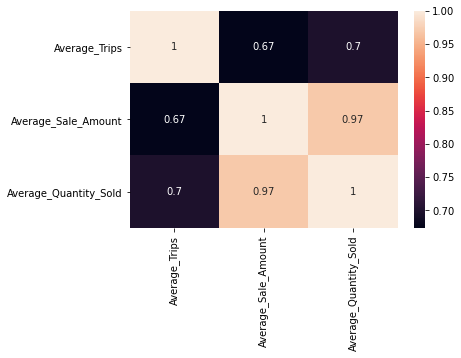

In [50]:
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.DataFrame(aggregatedYearlyData,columns=['Average_Trips','Average_Sale_Amount','Average_Quantity_Sold'])
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [51]:
# Let's explore the different customer segments for the entire year using different clustering techniques. 
# Each "UniSA Customer Number" is a point in three dimensions: "Average Number of Trips" "Average Sale Amount", 
# and "Average Quantity Sold". 
# Before that we normalize our data.

aggregatedYearlyDataForPCA = aggregatedYearlyData[["Average_Trips", "Average_Sale_Amount", "Average_Quantity_Sold"]]
aggregatedYearlyDataForPCA["Average_Trips"] = (aggregatedYearlyDataForPCA["Average_Trips"] - myStats.mean(aggregatedYearlyDataForPCA["Average_Trips"])) / myStats.stdev(aggregatedYearlyDataForPCA["Average_Trips"])
aggregatedYearlyDataForPCA["Average_Sale_Amount"] = (aggregatedYearlyDataForPCA["Average_Sale_Amount"] - myStats.mean(aggregatedYearlyDataForPCA["Average_Sale_Amount"])) / myStats.stdev(aggregatedYearlyDataForPCA["Average_Sale_Amount"])
aggregatedYearlyDataForPCA["Average_Quantity_Sold"] = (aggregatedYearlyDataForPCA["Average_Quantity_Sold"] - myStats.mean(aggregatedYearlyDataForPCA["Average_Quantity_Sold"])) / myStats.stdev(aggregatedYearlyDataForPCA["Average_Quantity_Sold"])

In [52]:
aggregatedYearlyDataForPCA

,Average_Trips,Average_Sale_Amount,Average_Quantity_Sold
0,0.8519,0.5593,0.6877
1,1.3500,2.2928,1.8190
2,-0.6423,-0.5157,-0.5529
3,-0.6423,-0.5254,-0.5043
4,-0.6423,-1.0021,-1.0030
...,...,...,...
10999,-0.4763,-0.4441,-0.3827
11000,-0.8083,-0.4524,-0.5651
11001,-0.1442,-0.4085,-0.2367
11002,-0.6423,-0.2657,-0.5165


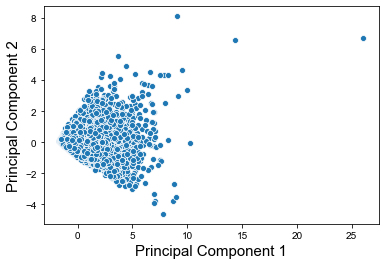

In [53]:
# Before we proceed, let's plot our data to get an idea of the different customer segements that may exist. 
# Our data is three dimensional, but we need to plot it in two dimensions. For this we'll use Principal Component Analysis. 
# We create an object for Principal Component Analysis (PCA).

pCA = sklearnPCA(n_components = 2)
pCAYearData = pd.DataFrame(pCA.fit_transform(aggregatedYearlyDataForPCA))
pCAYearData.columns = ["Principal Component 1", "Principal Component 2"]
pCAYearData.index = aggregatedYearlyData["UniSA_Customer_No"]
aggregatedYearlyDataForPCA.index = aggregatedYearlyData["UniSA_Customer_No"]
aggregatedYearlyData.index = aggregatedYearlyData["UniSA_Customer_No"]
figure = sb.scatterplot(x = pCAYearData["Principal Component 1"], y = pCAYearData["Principal Component 2"])
sb.set(rc={'figure.figsize':(17.7,8.27)})
figure.set_xlabel("Principal Component 1",fontsize=15)
figure.set_ylabel("Principal Component 2",fontsize=15)
figure

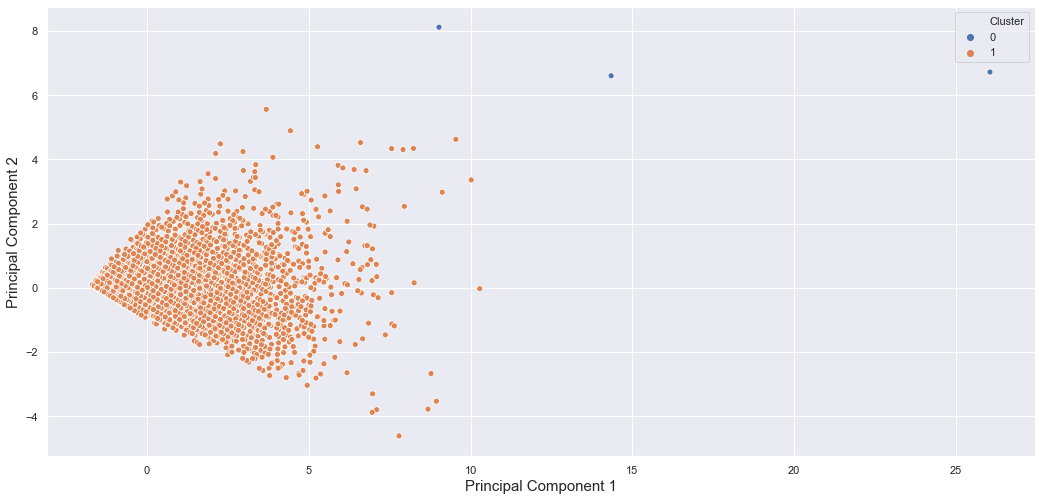

In [54]:
# The PCA scatterplot for shows two groups, of which one group might be outliers
# To deal with such data, we use the DBSCAN Clustering method for customer segmentation.

dbscanClustering = sklearnDBSCAN(eps = 3, min_samples = 10).fit(aggregatedYearlyDataForPCA)
clusterNumbers = [cluster + 1 for cluster in dbscanClustering.labels_.tolist()]
aggregatedYearlyDataForPCA["Cluster"] = clusterNumbers
pCAYearData.columns = ["0", "1"]
pCAYearData["Cluster"] = clusterNumbers
aggregatedYearlyData["Cluster"] = clusterNumbers
scatterPlot = sb.scatterplot(x = pCAYearData["0"], y = pCAYearData["1"], hue = pCAYearData["Cluster"], data = pCAYearData)
sb.set(rc={'figure.figsize':(17.7,8.27)})
scatterPlot.set_xlabel("Principal Component 1",fontsize=15)
scatterPlot.set_ylabel("Principal Component 2",fontsize=15)
scatterPlot

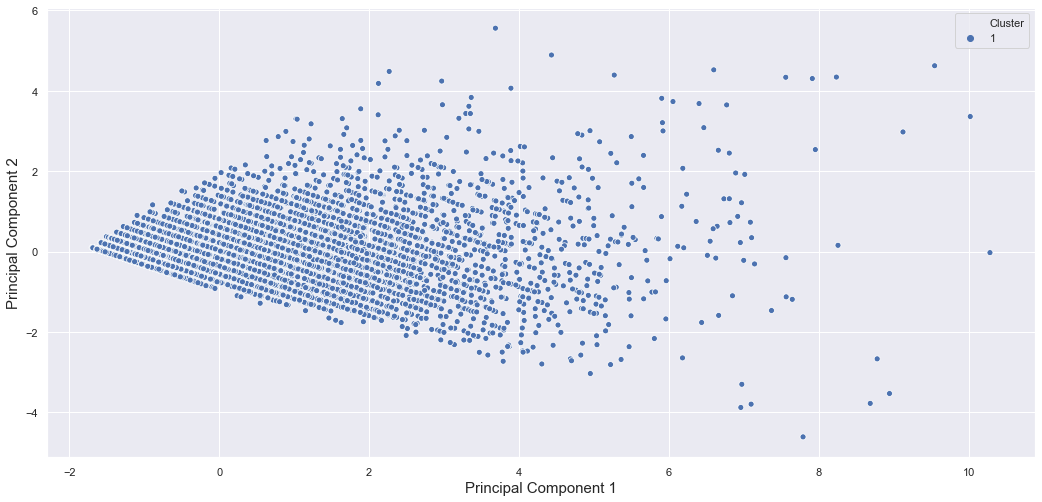

In [55]:
# It is evident that there are three outliers which will cause problems while clustering our data. 
# For this reason, we remove the outlier belonging to cluster "0".

outlierRecordIndices = pCAYearData[pCAYearData["Cluster"] == 0].index.tolist()
outlierRecordIndices
pCAYearData = pCAYearData.drop(outlierRecordIndices, axis = 0)
aggregatedYearlyDataForPCA = aggregatedYearlyDataForPCA.drop(outlierRecordIndices, axis = 0)
aggregatedYearlyData = aggregatedYearlyData.drop(outlierRecordIndices, axis = 0)
scatterPlot = sb.scatterplot(x = pCAYearData["0"], y = pCAYearData["1"], hue = pCAYearData["Cluster"], data = pCAYearData)
scatterPlot.set_xlabel("Principal Component 1",fontsize=15)
scatterPlot.set_ylabel("Principal Component 2",fontsize=15)
scatterPlot

In [56]:
# Next, we add these segment details to our aggregated data.

#DataBackup1 = aggregatedYearlyData
#DataBackup1["Segment_No"] = dbscanClustering
#DataBackup1

In [57]:
#test10 = DataBackup1[(DataBackup1['Cluster'] == 0)]
#test10

In [58]:
#test11 = DataBackup1[(DataBackup1['Cluster'] == 1) & (DataBackup1["Average_Trips"] < 76)]
#test11

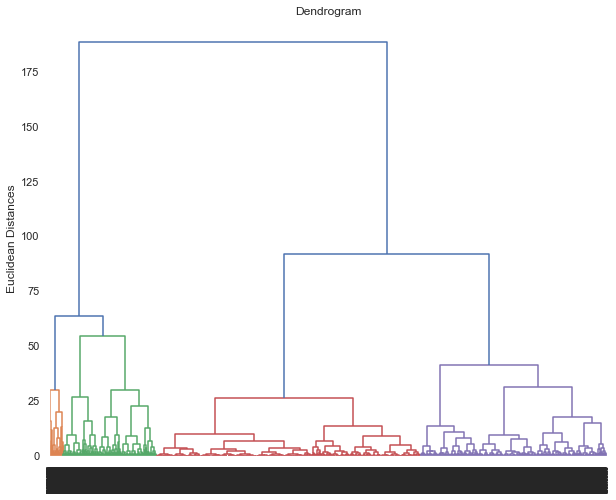

In [59]:
# We can see that there are no distinct groups in the data. Let's try using Herarchical Clustering methods.

linked = linkage(pCAYearData, method = "ward")

labelList = pCAYearData.index.tolist()

plt.figure(figsize = (10, 8))  
heirarchicalClustering = dendrogram(linked, orientation = "top", labels = labelList, distance_sort = "descending", show_leaf_counts = True, color_threshold = 55)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distances')
plt.show()   

#import scipy.cluster.hierarchy as sch

#dendrogram = sch.dendrogram(sch.linkage(pCAYearData, method  = "ward"))
#plt.title('Dendrogram')
#plt.xlabel('Customers')
#plt.ylabel('Euclidean distances')
#plt.show()

Text(0, 0.5, 'Average No. of Products Purchased per Year')

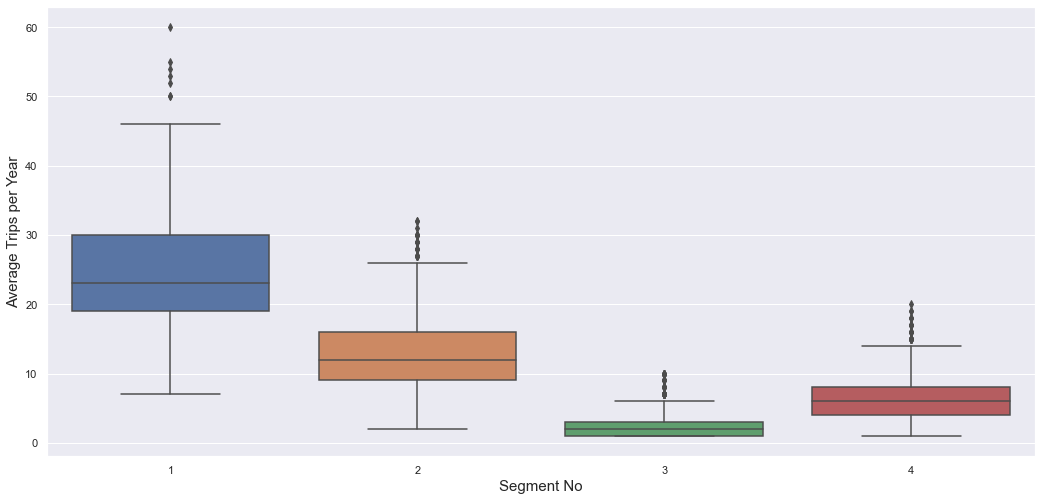

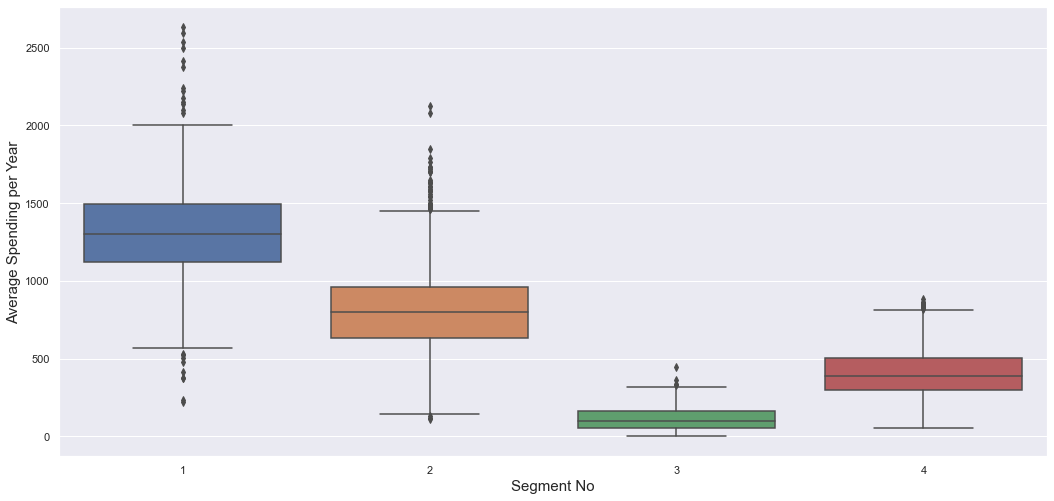

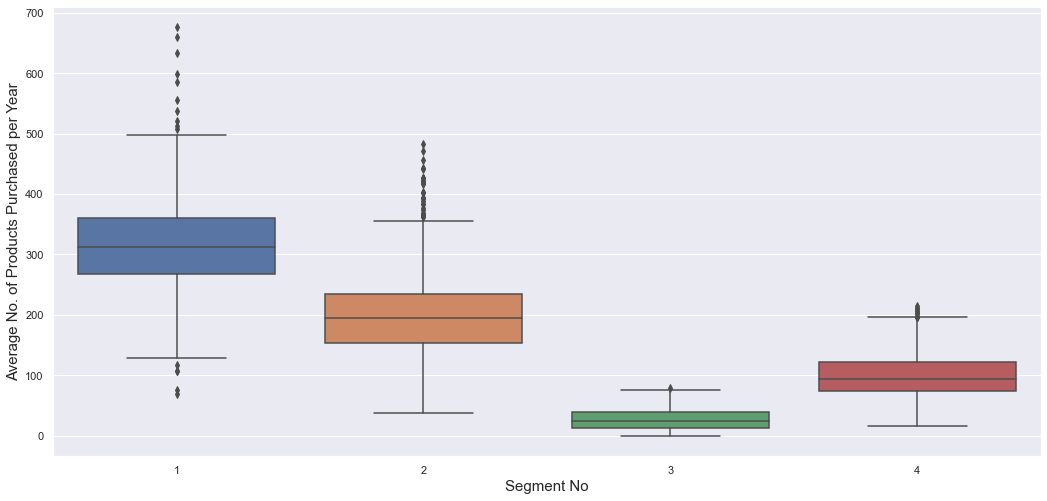

In [60]:
# We see that there are three possible segments of customers for the year 2014.
# We need to extract the segment numbers for each segment.

heirarchicalClustering = fcluster(linked, t = 60, depth = 4, criterion = "distance")

# Next, we add these segment details to our aggregated data.
aggregatedYearlyData["Segment_No"] = heirarchicalClustering


# Let's check the distribution of "UniSA Customer Numbers" based on "Average Number of Trips made per Month", 
# "Average Sale Amount for the Month" and "Average Quantity Sold."


# Let's create box plots for "Average Number of Trips made".
plt.figure()
boxPlotAverageNoOfTrips = sb.boxplot(x = "Segment_No", y = "Average_Trips", data = aggregatedYearlyData)
boxPlotAverageNoOfTrips.set(xlabel = "Segment No.", ylabel = "Average Trips per Year")
boxPlotAverageNoOfTrips.set_xlabel("Segment No",fontsize=15)
boxPlotAverageNoOfTrips.set_ylabel("Average Trips per Year",fontsize=15)

# Let's create box plots for "Average Sale Amount".
plt.figure()
boxPlotAverageSaleAmount = sb.boxplot(x = "Segment_No", y = "Average_Sale_Amount", data = aggregatedYearlyData)
boxPlotAverageSaleAmount.set(xlabel = "Segment No.", ylabel = "Average Spending per Year")
boxPlotAverageSaleAmount.set_xlabel("Segment No",fontsize=15)
boxPlotAverageSaleAmount.set_ylabel("Average Spending per Year",fontsize=15)

# Let's create box plots for "Average Quantity Sold to the Customer".
plt.figure()
boxPlotAverageQuantitySold = sb.boxplot(x = "Segment_No", y = "Average_Quantity_Sold", data = aggregatedYearlyData)
boxPlotAverageQuantitySold.set(xlabel = "Segment No.", ylabel = "Average No. of Products Purchased per Year")
boxPlotAverageQuantitySold.set_xlabel("Segment No",fontsize=15)
boxPlotAverageQuantitySold.set_ylabel("Average No. of Products Purchased per Year",fontsize=15)

In [61]:
aggregatedYearlyData

,Year,UniSA_Customer_No,Average_Trips,Average_Sale_Amount,Average_Quantity_Sold,Cluster,Segment_No
UniSA_Customer_No,,,,,,,
299827,2014,299827,11.0000,548.8400,144.0000,1,2
1925237,2014,1925237,14.0000,1134.3683,237.0000,1,2
2984536,2014,2984536,2.0000,185.7225,42.0000,1,3
3004639,2014,3004639,2.0000,182.4380,46.0000,1,3
5225820,2014,5225820,2.0000,21.4138,5.0000,1,3
...,...,...,...,...,...,...,...
9993952646,2014,9993952646,3.0000,209.8970,56.0000,1,3
9994391298,2014,9994391298,1.0000,207.0829,41.0000,1,3
9994971948,2014,9994971948,5.0000,221.9391,68.0000,1,3


In [62]:
hresult1 = pd.DataFrame(aggregatedYearlyData[aggregatedYearlyData["Segment_No"] == 1])
hresult1

,Year,UniSA_Customer_No,Average_Trips,Average_Sale_Amount,Average_Quantity_Sold,Cluster,Segment_No
UniSA_Customer_No,,,,,,,
10854648,2014,10854648,27.0000,1211.0182,255.0000,1,1
79457466,2014,79457466,16.0000,1428.5735,357.0000,1,1
81428740,2014,81428740,32.0000,597.0207,173.0000,1,1
160346156,2014,160346156,20.0000,1136.4958,263.0000,1,1
165510841,2014,165510841,18.0000,1446.4995,402.0000,1,1
...,...,...,...,...,...,...,...
9763072936,2014,9763072936,30.0000,1999.5145,302.0000,1,1
9791161355,2014,9791161355,24.0000,1475.4000,289.0000,1,1
9900547509,2014,9900547509,16.0000,1447.8658,394.0000,1,1


In [63]:
hresult2 = pd.DataFrame(aggregatedYearlyData[aggregatedYearlyData["Segment_No"] == 2])
hresult2

,Year,UniSA_Customer_No,Average_Trips,Average_Sale_Amount,Average_Quantity_Sold,Cluster,Segment_No
UniSA_Customer_No,,,,,,,
299827,2014,299827,11.0000,548.8400,144.0000,1,2
1925237,2014,1925237,14.0000,1134.3683,237.0000,1,2
14375092,2014,14375092,12.0000,527.3750,157.0000,1,2
16000817,2014,16000817,16.0000,949.8082,249.0000,1,2
16406306,2014,16406306,14.0000,423.4200,124.0000,1,2
...,...,...,...,...,...,...,...
9968908195,2014,9968908195,16.0000,374.7317,104.0000,1,2
9982774900,2014,9982774900,9.0000,762.2083,192.0000,1,2
9984440359,2014,9984440359,10.0000,661.8198,162.0000,1,2


In [64]:
hresult3 = pd.DataFrame(aggregatedYearlyData[aggregatedYearlyData["Segment_No"] == 3])
hresult3

,Year,UniSA_Customer_No,Average_Trips,Average_Sale_Amount,Average_Quantity_Sold,Cluster,Segment_No
UniSA_Customer_No,,,,,,,
2984536,2014,2984536,2.0000,185.7225,42.0000,1,3
3004639,2014,3004639,2.0000,182.4380,46.0000,1,3
5225820,2014,5225820,2.0000,21.4138,5.0000,1,3
5316222,2014,5316222,1.0000,32.6900,5.0000,1,3
5714956,2014,5714956,5.0000,129.1864,27.0000,1,3
...,...,...,...,...,...,...,...
9993879211,2014,9993879211,2.0000,26.9800,6.0000,1,3
9993952646,2014,9993952646,3.0000,209.8970,56.0000,1,3
9994391298,2014,9994391298,1.0000,207.0829,41.0000,1,3


In [65]:
hresult4 = pd.DataFrame(aggregatedYearlyData[aggregatedYearlyData["Segment_No"] == 4])
hresult4

,Year,UniSA_Customer_No,Average_Trips,Average_Sale_Amount,Average_Quantity_Sold,Cluster,Segment_No
UniSA_Customer_No,,,,,,,
6312990,2014,6312990,3.0000,303.2167,77.0000,1,4
9826891,2014,9826891,7.0000,416.3313,93.0000,1,4
13352077,2014,13352077,6.0000,385.7383,87.0000,1,4
16032225,2014,16032225,2.0000,229.6200,68.0000,1,4
17411245,2014,17411245,5.0000,490.7327,73.0000,1,4
...,...,...,...,...,...,...,...
9984705419,2014,9984705419,9.0000,665.3750,191.0000,1,4
9988090575,2014,9988090575,12.0000,282.7664,68.0000,1,4
9991166278,2014,9991166278,8.0000,379.1433,103.0000,1,4


In [66]:
Describe1 = hresult1[['Average_Trips', 'Average_Sale_Amount', 'Average_Quantity_Sold']]
Describe1.describe()

,Average_Trips,Average_Sale_Amount,Average_Quantity_Sold
count,274.0000,274.0000,274.0000
mean,25.0657,1317.6364,318.3723
std,8.8750,384.2942,89.5152
min,7.0000,220.4049,69.0000
25%,19.0000,1123.0773,267.0000
50%,23.0000,1298.7987,312.5000
75%,30.0000,1496.3900,359.7500
max,60.0000,2631.2900,676.0000


In [67]:
Describe2 = hresult2[['Average_Trips', 'Average_Sale_Amount', 'Average_Quantity_Sold']]
Describe2.describe()

,Average_Trips,Average_Sale_Amount,Average_Quantity_Sold
count,1842.0000,1842.0000,1842.0000
mean,12.8149,815.4686,198.8051
std,5.2785,267.7479,62.9438
min,2.0000,114.2775,37.0000
25%,9.0000,629.9968,154.0000
50%,12.0000,801.0632,195.0000
75%,16.0000,962.0682,235.0000
max,32.0000,2125.0425,482.0000


In [68]:
Describe3 = hresult3[['Average_Trips', 'Average_Sale_Amount', 'Average_Quantity_Sold']]
Describe3.describe()

,Average_Trips,Average_Sale_Amount,Average_Quantity_Sold
count,5222.0000,5222.0000,5222.0000
mean,2.2099,113.2494,27.1109
std,1.3243,70.0132,16.8927
min,1.0000,2.6900,0.0000
25%,1.0000,54.9959,13.0000
50%,2.0000,101.1872,25.0000
75%,3.0000,163.3550,39.0000
max,10.0000,444.0145,79.0000


In [69]:
Describe4 = hresult4[['Average_Trips', 'Average_Sale_Amount', 'Average_Quantity_Sold']]
Describe4.describe()

,Average_Trips,Average_Sale_Amount,Average_Quantity_Sold
count,3663.0000,3663.0000,3663.0000
mean,6.0830,409.1124,99.6639
std,2.9849,147.9936,34.4442
min,1.0000,51.8592,16.0000
25%,4.0000,297.8308,74.0000
50%,6.0000,386.0633,94.0000
75%,8.0000,505.0067,123.0000
max,20.0000,883.9425,215.0000


In [74]:
# RFM Segmentation Analysis

# Finding Sale_Time_Length to set seconds for missing Sale_Time.

RFM = yearDataFile

RFM["Sale_Time"][RFM["Sale_Time"] == 'nan'] = "00:00:00"

RFM['Sale_Time'] = RFM['Sale_Time'].astype(str)
RFM['Sale_Time_Length'] = RFM['Sale_Time'].astype(str).map(len)

Seconds = ':00'
RFM["Sale_Time"][RFM["Sale_Time_Length"] == 5] = RFM["Sale_Time"] + Seconds

#Creating a new variable "Time Stamp"

RFM['TimeStamp'] = RFM["Sale_Date"] + " " + RFM["Sale_Time"]

RFM

,Sale_Date,Sale_Time,UniSA_Receipt_No1,Receipt_Line_No,UniSA_Customer_No,Total_Sale_Amount_InclusiveGST,Total_Receipt_Lines,Quantity_Sold,Item_Value,Day,Month,Year,Sale_Time_Length,TimeStamp
0,2014-01-02,08:03:00,50661,1,693320906,1.2000,1,1.0000,1.2000,02,01,2014,8,2014-01-02 08:03:00
1,2014-01-02,08:23:00,584701,1,693320906,158.6700,31,1.0000,2.9900,02,01,2014,8,2014-01-02 08:23:00
2,2014-01-02,08:23:00,584701,2,693320906,158.6700,31,1.0000,7.0000,02,01,2014,8,2014-01-02 08:23:00
3,2014-01-02,08:23:00,584701,3,693320906,158.6700,31,1.0000,7.0000,02,01,2014,8,2014-01-02 08:23:00
4,2014-01-02,08:23:00,584701,4,693320906,158.6700,31,1.0000,4.2900,02,01,2014,8,2014-01-02 08:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11500152,2014-12-31,11:32:39,47047,35,5949334180,185.5500,36,1.0000,6.3500,31,12,2014,8,2014-12-31 11:32:39
11500153,2014-12-31,11:32:39,47047,36,5949334180,185.5500,36,1.0000,2.7500,31,12,2014,8,2014-12-31 11:32:39
11500154,2014-12-31,11:32:39,47047,37,5949334180,185.5500,36,1.0000,2.7500,31,12,2014,8,2014-12-31 11:32:39
11500155,2014-12-31,11:32:39,47047,38,5949334180,185.5500,36,1.0000,2.7500,31,12,2014,8,2014-12-31 11:32:39


In [75]:
# What is the time frame of the data?

print('Orders from {} to {}'.format(RFM['TimeStamp'].min(),
                                    RFM['TimeStamp'].max()))

Orders from 2014-01-02 08:03:00 to 2014-12-31 19:01:09


In [76]:
#orders = RFM.groupby(['UniSA_Receipt_No1', 'Sale_Date', 'UniSA_Customer_No']).agg({'Item_Value': lambda x: x.sum()}).reset_index().rename(columns = {"UniSA_Receipt_No1": "InvoiceNo", "Sale_Date": "InvoiceDate", "UniSA_Customer_No": "CustomerID", "Item_Value": "Total_Sale_Amount"})
#orders.head(20)

In [77]:
# Calculate the recent date which in this case will be 2015-01-01.

from datetime import timedelta

NOW = pd.to_datetime(RFM['TimeStamp']).max() + timedelta(days=1)
NOW

RFM['TimeStamp'] = pd.to_datetime(RFM['TimeStamp'])

In [78]:
# Exclude "super customers"

RFM = RFM[RFM.UniSA_Customer_No != 9333734328]
RFM = RFM[RFM.UniSA_Customer_No != 693320906]
RFM = RFM[RFM.UniSA_Customer_No != 9721472842]
RFM = RFM[RFM.UniSA_Customer_No != 1408064326]
RFM

,Sale_Date,Sale_Time,UniSA_Receipt_No1,Receipt_Line_No,UniSA_Customer_No,Total_Sale_Amount_InclusiveGST,Total_Receipt_Lines,Quantity_Sold,Item_Value,Day,Month,Year,Sale_Time_Length,TimeStamp
11290,2014-01-02,08:04:00,50662,1,3027124388,1.2000,1,1.0000,1.2000,02,01,2014,8,2014-01-02 08:04:00
11291,2014-01-09,12:35:00,52853,1,3027124388,5.9900,1,1.0000,5.9900,09,01,2014,8,2014-01-09 12:35:00
11292,2014-01-27,14:17:00,56665,1,3027124388,5.6000,2,0.2400,0.9100,27,01,2014,8,2014-01-27 14:17:00
11293,2014-01-27,14:17:00,56665,2,3027124388,5.6000,2,1.0000,4.6900,27,01,2014,8,2014-01-27 14:17:00
11294,2014-01-30,12:56:00,59112,1,3027124388,5.9900,1,1.0000,5.9900,30,01,2014,8,2014-01-30 12:56:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11500152,2014-12-31,11:32:39,47047,35,5949334180,185.5500,36,1.0000,6.3500,31,12,2014,8,2014-12-31 11:32:39
11500153,2014-12-31,11:32:39,47047,36,5949334180,185.5500,36,1.0000,2.7500,31,12,2014,8,2014-12-31 11:32:39
11500154,2014-12-31,11:32:39,47047,37,5949334180,185.5500,36,1.0000,2.7500,31,12,2014,8,2014-12-31 11:32:39
11500155,2014-12-31,11:32:39,47047,38,5949334180,185.5500,36,1.0000,2.7500,31,12,2014,8,2014-12-31 11:32:39


In [79]:
NOW

Timestamp('2015-01-01 19:01:09')

In [80]:
# Create a RFM table

RFM_table = RFM.groupby('UniSA_Customer_No').agg({'TimeStamp': lambda x: (NOW - x.max()).days, 'UniSA_Receipt_No1': lambda x: len(x), 'Item_Value': lambda x: x.sum()}).rename(columns = {"UniSA_Receipt_No1": "Frequency", "TimeStamp": "Recency", "Item_Value": "Monetary_Value"})
RFM_table

,Recency,Frequency,Monetary_Value
UniSA_Customer_No,,,
299827,1,1859,6586.0800
1925237,2,2870,13612.4192
2984536,9,182,742.8900
3004639,21,400,1824.3800
5225820,15,38,171.3100
...,...,...,...
9993952646,5,564,2098.9700
9994391298,32,291,1449.5800
9994971948,4,862,2663.2694


In [81]:
# Split the metrics
# The easiest way to split metrics into segments is by using quartiles.This gives us a starting point for the detailed analysis.
# 4 segments are easy to understand and explain.

quantiles = RFM_table.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary_Value
0.2500,2.0000,170.0000,721.7400
0.5000,8.0000,653.0000,2624.5700
0.7500,21.0000,1488.0000,6027.5000


In [84]:
# Create a segmented RFM table

RFM_Segment = RFM_table.copy()

# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
    
#RFM_Segment['R'] = RFM_Segment['Recency'].apply(RFMScore, args=('Recency',quantiles,))
#RFM_Segment['F'] = RFM_Segment['Frequency'].apply(RFMScore, args=('Frequency',quantiles,))
#RFM_Segment['M'] = RFM_Segment['Monetary_Value'].apply(RFMScore, args=('Monetary_Value',quantiles,))

RFM_Segment['R'] = RFM_Segment['Recency'].apply(R_Class, args=('Recency',quantiles,))
RFM_Segment['F'] = RFM_Segment['Frequency'].apply(FM_Class, args=('Frequency',quantiles,))
RFM_Segment['M'] = RFM_Segment['Monetary_Value'].apply(FM_Class, args=('Monetary_Value',quantiles,))

# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
#RFM_Segment['RFM_Segment'] = RFM_Segment.apply(join_rfm, axis=1)

# Calculate RFM_Score
RFM_Segment['RFM_Score'] = RFM_Segment[['R','F','M']].sum(axis=1)

RFM_Segment['RFMClass'] = RFM_Segment.R.map(str) \
                            + RFM_Segment.F.map(str) \
                            + RFM_Segment.M.map(str)

RFM_Segment

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Score,RFMClass
UniSA_Customer_No,,,,,,,,
299827,1,1859,6586.0800,4,4,4,12,444
1925237,2,2870,13612.4192,4,4,4,12,444
2984536,9,182,742.8900,2,2,2,6,222
3004639,21,400,1824.3800,2,2,2,6,222
5225820,15,38,171.3100,2,1,1,4,211
...,...,...,...,...,...,...,...,...
9993952646,5,564,2098.9700,3,2,2,7,322
9994391298,32,291,1449.5800,1,2,2,5,122
9994971948,4,862,2663.2694,3,3,3,9,333


In [85]:
# Who are my best customers (Top 10)?

#RFMClass = 444

RFM_Segment[RFM_Segment['RFMClass']=='444'].sort_values('Monetary_Value', ascending=False).head(10)

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Score,RFMClass
UniSA_Customer_No,,,,,,,,
5020378059,2,7411,31119.5990,4,4,4,12,444
5423069509,1,5302,30434.6162,4,4,4,12,444
1669313588,1,5440,28936.1578,4,4,4,12,444
7409267952,1,4418,28518.2768,4,4,4,12,444
1391639767,1,7400,27472.7545,4,4,4,12,444
1944590759,1,5618,26633.5007,4,4,4,12,444
4131206747,1,5565,25829.5039,4,4,4,12,444
2782584439,2,2225,25500.5100,4,4,4,12,444
2582756094,1,5110,25170.3465,4,4,4,12,444


In [86]:
#test = RFM_Segment[RFM_Segment['Frequency'] > 2734]
#test

In [87]:
# Who are the lost customers?

#Customers who's recency, frequency as well as monetary values are low 

RFM_Segment[RFM_Segment['RFMClass']=='111'].sort_values('Recency',ascending=False).head(10)

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Score,RFMClass
UniSA_Customer_No,,,,,,,,
7331576732,364,2,2.9100,1,1,1,3,111
9021492613,362,12,50.1900,1,1,1,3,111
6538426678,362,28,98.5200,1,1,1,3,111
3430857792,362,9,57.5200,1,1,1,3,111
4545589116,360,1,3.5900,1,1,1,3,111
4701255832,360,13,44.5600,1,1,1,3,111
1744453323,359,5,29.2100,1,1,1,3,111
6971919651,358,2,15.5100,1,1,1,3,111
635347717,356,8,26.6700,1,1,1,3,111


In [88]:
#SuperCustomers['UniSA_Customer_No'].unique()

In [89]:
# Create human friendly RFM labels
segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][2-3]': 'At Risk',
    r'[1-2]4': 'Can\'t Loose Them',
    r'2[1-2]': 'About To Sleep',
    r'22': 'Needs Attention',
    r'[2-3][3-4]': 'Loyal Customers',
    r'31': 'Promising',
    r'41': 'New Customers',
    r'[3-4][1-2]': 'Potential Loyalists',
    r'4[3-4]': 'Champions'
}
RFM_Segment['Segment'] = RFM_Segment['R'].map(str) + RFM_Segment['F'].map(str)
RFM_Segment['Segment'] = RFM_Segment['Segment'].replace(segt_map, regex=True)
RFM_Segment.head(40)

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Score,RFMClass,Segment
UniSA_Customer_No,,,,,,,,,
299827,1,1859,6586.0800,4,4,4,12,444,Champions
1925237,2,2870,13612.4192,4,4,4,12,444,Champions
2984536,9,182,742.8900,2,2,2,6,222,Hibernating
3004639,21,400,1824.3800,2,2,2,6,222,Hibernating
5225820,15,38,171.3100,2,1,1,4,211,Hibernating
5316222,120,5,32.6900,1,1,1,3,111,Hibernating
5714956,9,314,1421.0500,2,2,2,6,222,Hibernating
6312990,15,867,3638.6000,2,3,3,8,233,At Risk
6652575,352,26,82.0000,1,1,1,3,111,Hibernating


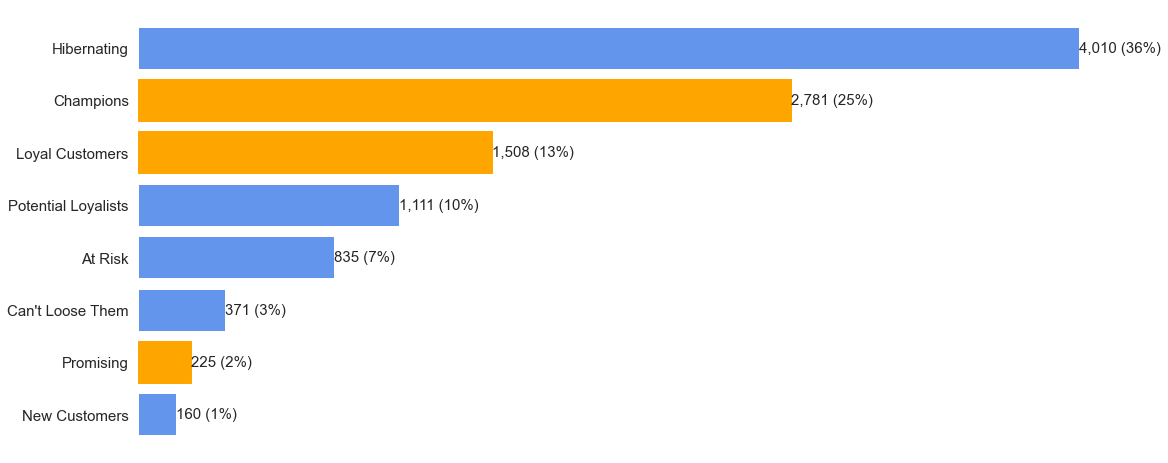

In [90]:
# count the number of customers in each segment

segments_counts = RFM_Segment['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='cornflowerblue')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False
               )
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index, fontsize=15)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Champions', 'Promising', 'Loyal Customers']:
            bar.set_color('orange')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                    '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left',
                size=15
               )
        

plt.show()